In [31]:
# Analyse data for black friday sale at a retailer.

#Dataset of 550 000 observations about the black Friday sale in a retail store
#Data is extracted from Kaggle.com

#Objective:
# Who is more likely to spend more in a black Friday sale?
# Based on Age Group
# Gender
# Occupation

# Which product sell the most?



In [1]:
#Importing all the required libraries to perform the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as st
import seaborn as sns

In [2]:
# Data Collection
# Import the dataset to Panda Dataframe
dataset = pd.read_csv('F:\\COURSE\\BlackFriday.csv')
dataset.info()
#Most of features are self explanatory.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [3]:
dataset.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [4]:
#Data Cleaning Process
# check if any columns in data set is blank
dataset.isnull().any().any()

True

In [5]:
# To check which column has NaN
dataset.columns[dataset.isna().any()].tolist()

['Product_Category_2', 'Product_Category_3']

In [6]:
# Replace NaN values with mean for Product_Category_2 and Product_Category_2
dataset["Product_Category_2"].fillna(dataset["Product_Category_2"].mean(), inplace=True)
dataset["Product_Category_3"].fillna(dataset["Product_Category_3"].mean(), inplace=True)

# Again check for NaN columns
dataset.columns[dataset.isna().any()].tolist()

# we got rid of all the null values

[]

In [7]:
# Remove the duplicate record. 
dataset = dataset.drop_duplicates()

In [8]:
# Product Id, Stay_In_Current_City_Years, UserID are not required for analysis 
dataset = dataset.drop(['Product_ID','Stay_In_Current_City_Years','User_ID'], axis=1)
dataset.head(3)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,0,3,9.842144,12.66984,8370
1,F,0-17,10,A,0,1,6.000000,14.00000,15200
2,F,0-17,10,A,0,12,9.842144,12.66984,1422


In [9]:
## Convert male and female in "Gender" to 1 and 0
# Change categorical data
dataset['Gender']=dataset['Gender'].map({'M':0,'F':1})
#dataset['Age']=dataset['Age'].map({'0-17':17,'18-25':25,'26-35':35,'36-45':45,'46-50':50,'51-55':55,'55+':100})
#dataset['City_Category'] = dataset['City_Category'].map({'A':0,'B':1,'C':2})

In [10]:
dataset.head(10)

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0-17,10,A,0,3,9.842144,12.66984,8370
1,1,0-17,10,A,0,1,6.000000,14.00000,15200
2,1,0-17,10,A,0,12,9.842144,12.66984,1422
3,1,0-17,10,A,0,12,14.000000,12.66984,1057
4,0,55+,16,C,0,8,9.842144,12.66984,7969
5,0,26-35,15,A,0,1,2.000000,12.66984,15227
6,0,46-50,7,B,1,1,8.000000,17.00000,19215
7,0,46-50,7,B,1,1,15.000000,12.66984,15854
8,0,46-50,7,B,1,1,16.000000,12.66984,15686
9,0,26-35,20,A,1,8,9.842144,12.66984,7871


Age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: Purchase, dtype: int64


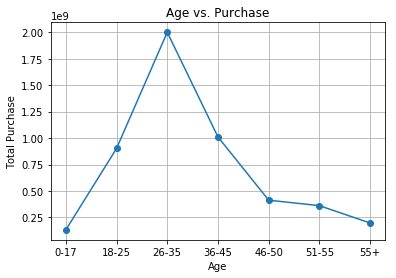

In [11]:
# Which age group has purchased more?
# Line plot
#Created a dataset by Calculate the sum of purchase amount for each age group.
agedf=dataset['Purchase'].groupby(dataset['Age']).sum()
print(agedf)
plt.plot(agedf,marker='o')
plt.title('Age vs. Purchase')
plt.xlabel('Age')
plt.ylabel('Total Purchase')
plt.grid(True)
plt.show()

# People between 26 and 35 years purchase more.

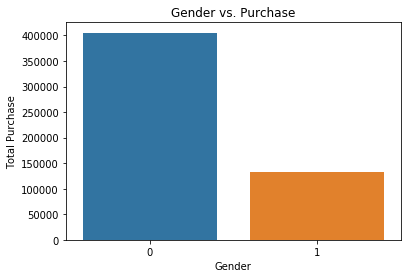

In [12]:
# Who is more likely to spend more in a black Friday sale?
sns.countplot(dataset['Gender'])
plt.title('Gender vs. Purchase')
plt.xlabel('Gender')
plt.ylabel('Total Purchase')
plt.show()

#Looks like very less number of females shopped for the black friday sale. 
#But it could also means may be their spouse paid for them.

In [13]:
#Get Pandas Series object
frame = dataset.groupby(['Age','Gender','Marital_Status'])['Purchase'].sum()
# Convert Series to DataFrame for using it in analysis
frame = frame.to_frame().reset_index()
frame.head(2)

,Age,Gender,Marital_Status,Purchase
0,0-17,0,0,90832391
1,0-17,1,0,41826615


In [14]:
# Create a subset of frame
married = frame[frame['Marital_Status'] == 1 ]
married

,Age,Gender,Marital_Status,Purchase
3,18-25,0,1,138196196
5,18-25,1,1,48904272
7,26-35,0,1,604728598
9,26-35,1,1,179393032
11,36-45,0,1,304535975
13,36-45,1,1,90618116
15,46-50,0,1,214313002
17,46-50,1,1,87683684
19,51-55,0,1,203319162
21,51-55,1,1,55777007


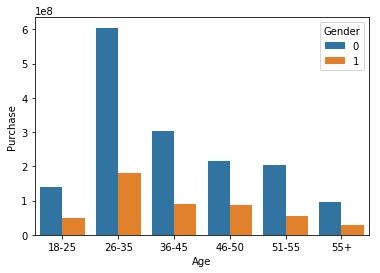

In [15]:
# Barplot for purchase as per age and gender
# The subset is ony for married people
sns.barplot(x="Age", y="Purchase", hue="Gender", data=married)
#There are no bars for the married in the 0-17 range which makes sense. 
#So it could imply that though ladies do shop a lot, 
#their spouses are possibly paying for it and hence data reflects that men shopped more.

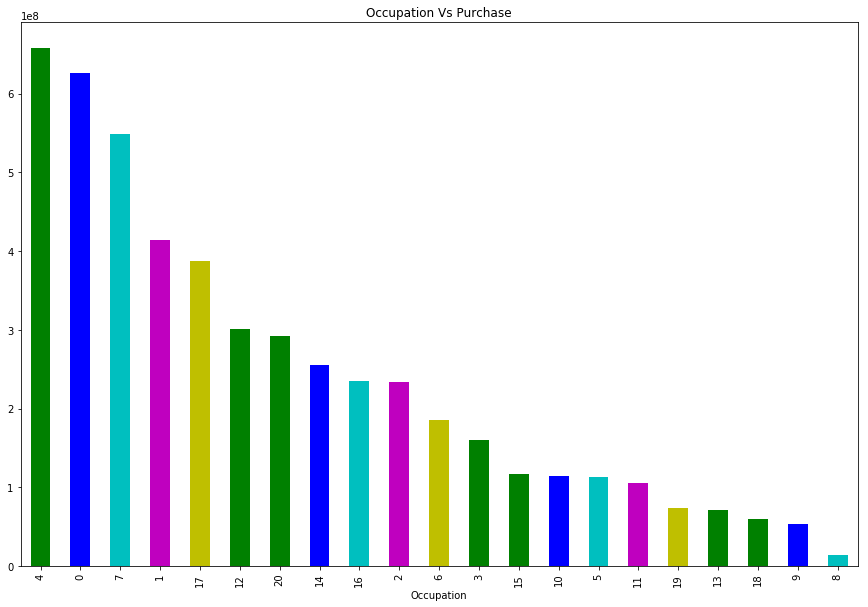

In [16]:
#Total purchase for each occupations

occupationdf=dataset['Purchase'].groupby(dataset['Occupation']).sum()
(occupationdf.sort_values(inplace=True,ascending=False))
occupationdf.plot(kind='bar', y='Purchase', figsize = (15,10), width = 0.5, 
                  title='Occupation Vs Purchase',
                  color=('g', 'b', 'c', 'm', 'y'))
plt.show()

# We observe that occupation 4,0 and 7 purchase the most

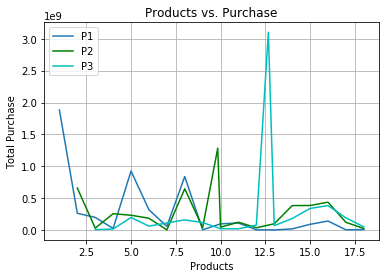

In [17]:
#Which Products sell the most
pcat1df=dataset['Purchase'].groupby(dataset['Product_Category_1']).sum()
pcat2df=dataset['Purchase'].groupby(dataset['Product_Category_2']).sum()
pcat3df=dataset['Purchase'].groupby(dataset['Product_Category_3']).sum()
#print(pcat1df)
plt.plot(pcat1df,label='P1')
plt.plot(pcat2df,color='g',label='P2')
plt.plot(pcat3df,color='c',label='P3')
plt.title('Products vs. Purchase')
plt.xlabel('Products')
plt.ylabel('Total Purchase')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
#As observed Product 3 sells the most

In [7]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,4.223872,2.279938,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,8.000000,12.669840,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.842144,12.669840,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,12.669840,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000
